In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [ ]:
df = pd.read_csv('amazon_baby.csv')
df.head()

In [3]:
df['sentiments'] = df.rating.apply(lambda x: 0 if x in [1, 2] else 1)

In [4]:
df.head()

,name,review,rating,sentiments
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1


In [5]:
# Splitting the dataset
split = round(len(df)*0.8)
train_reviews = df['review'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['review'][split:]
test_label = df['sentiments'][split:]

print(train_reviews.shape)
print(train_label.shape)
print(test_reviews.shape)
print(test_label.shape)

(146825,)
(146825,)
(36706,)
(36706,)


In [6]:
# Convert all reviews to a string. Just a check if they arent in a string format already
import numpy as np
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [74]:
# Data processing parameters and hyper-parameters
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'
padding_type = 'post'

In [75]:
# Tokenizing the words
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [76]:
#Sentence to block of words
sequences = tokenizer.texts_to_sequences(training_sentences)  

# Padd if they are lesser than max length
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Do the same for the test data
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

AttributeError: 'int' object has no attribute 'lower'

In [10]:
print(sequences[0])

[48, 2539, 447, 24, 630, 19, 13, 11, 1145, 22, 219, 687, 5, 65, 294, 32670, 6582, 383, 447, 2630, 604, 800, 32671, 24, 548, 46, 7, 1702, 1118, 1769, 3, 35, 571, 1000, 160, 5, 38, 383, 447, 10, 331, 3, 2763, 3, 18, 110, 32672, 245, 361, 6983, 447, 32673, 69, 396, 82, 77, 3, 157, 6, 698, 49, 62, 28, 24, 1002, 6, 56, 1285, 3, 18, 46, 2899, 533, 10, 7, 126, 14, 7564, 73, 366, 711]


In [14]:
# Transforming to np arryas
# train_seq = np.array(sequences)
# train_labels = np.array(padded)
# test_seq = np.array(testing_sentences)
# test_labels = np.array(testing_padded)

# print(train_seq.shape)
# print(train_labels.shape)
# print(test_seq.shape)
# print(test_labels.shape)

C:\Users\KARAN\AppData\Local\Temp/ipykernel_908/1644352814.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train_seq = np.array(sequences)
C:\Users\KARAN\AppData\Local\Temp/ipykernel_908/1644352814.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test_seq = np.array(testing_sentences)


(146825,)
(146825, 120)
(36706,)
(36706, 120)


In [44]:
# Train_test split
from sklearn.model_selection import train_test_split
X_seq, val_seq, X_labels_list, val_labels_list = train_test_split(padded, training_labels, test_size=0.2)

In [46]:
print(X_seq.shape)
print(len(X_labels_list))
print(val_seq.shape)
print(len(val_labels_list))

X_labels = np.array(X_labels_list)
val_labels = np.array(val_labels_list)

print()
print(X_labels.shape)
print(val_labels.shape)

(117460, 120)
117460
(29365, 120)
29365

(117460,)
(29365,)


In [47]:
# Model creation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense

In [80]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim,input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "model_checkpoint"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,frequency='epoch',save_weights_only=True,verbose=1)


Epoch 1/4
3671/3671 [==============================] - 49s 13ms/step - loss: 0.3072 - accuracy: 0.8768 - val_loss: 0.2266 - val_accuracy: 0.9048

Epoch 00001: saving model to model_checkpoint
Epoch 2/4
3671/3671 [==============================] - 48s 13ms/step - loss: 0.2090 - accuracy: 0.9128 - val_loss: 0.2096 - val_accuracy: 0.9114

Epoch 00002: saving model to model_checkpoint
Epoch 3/4
3671/3671 [==============================] - 48s 13ms/step - loss: 0.1908 - accuracy: 0.9209 - val_loss: 0.2088 - val_accuracy: 0.9111

Epoch 00003: saving model to model_checkpoint
Epoch 4/4
3671/3671 [==============================] - 52s 14ms/step - loss: 0.1808 - accuracy: 0.9254 - val_loss: 0.2119 - val_accuracy: 0.9114

Epoch 00004: saving model to model_checkpoint


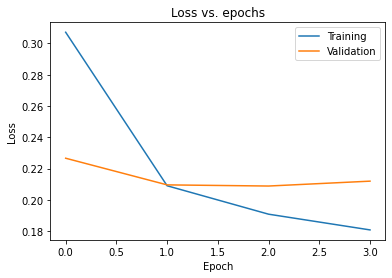

In [64]:
num_epochs = 4
history = model.fit(X_seq, X_labels, epochs=num_epochs, validation_data=(val_seq, val_labels),callbacks =[checkpoint])

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [65]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [66]:
y_test = np.array(testing_labels)
x_test = testing_padded

In [67]:
print("Train Accuracy:")
get_test_accuracy(model,X_seq,X_labels)

print("\nVal Accuracy:")
get_test_accuracy(model,val_seq,val_labels)

print("\nTest Accuracy:")
get_test_accuracy(model,x_test,y_test)

Train Accuracy:
accuracy: 0.932

Val Accuracy:
accuracy: 0.911

Test Accuracy:
accuracy: 0.918


In [81]:
# checkpoint_path = "model_checkpoint"
# model.load_weights(checkpoint_path)

In [84]:
# def predict_sentiment(predict_msg):
#     new_seq = tokenizer.texts_to_sequences(predict_msg)
#     padded = pad_sequences(new_seq, maxlen =max_length,
#                       padding = padding_type,
#                       truncating=trunc_type)
#     return (model.predict(padded))

In [91]:
# def main():
#     print("Welcom to Sentiment Analysis")
#     print("===================================================================")
#     while(True):
#         user_input = input("Input string: ")
#         prediction = np.array(predict_sentiment([user_input]))[0][0]
#         if prediction>=0.5:
#             print("Positive Feedback!")
#         else:
#             print("Negative feedback!")


#         user_input = input('Do you want another prediction? (y/[n])? ')
#         if user_input != 'y':
#             print("bye!")
#             break


# # In[15]:


# if __name__ == '__main__':
#     main()


Welcom to Sentiment Analysis
Input string: that was very bad. Extremely poor quality!
Negative feedback!
Do you want another prediction? (y/[n])? n
bye!
